<a href="https://colab.research.google.com/github/plaban1981/Dphi_hackathon/blob/main/Copy_of_Data_Sprint_37_Medical_Insurance_Cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement & Objective
 

Imagine yourself working as a data scientist in an insurance company. Your manager asked you to come up with a data science solution to estimate the medical cost of an individual who has bought health insurance in the institution. **Build a machine learning model to estimate the medical cost of an individual**.

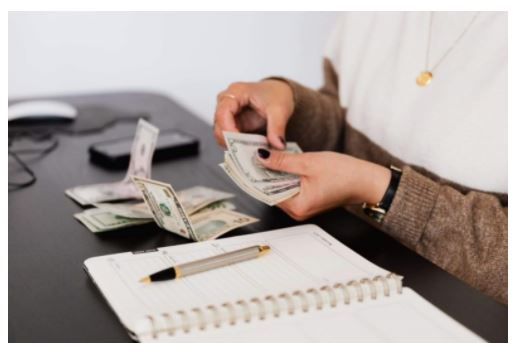

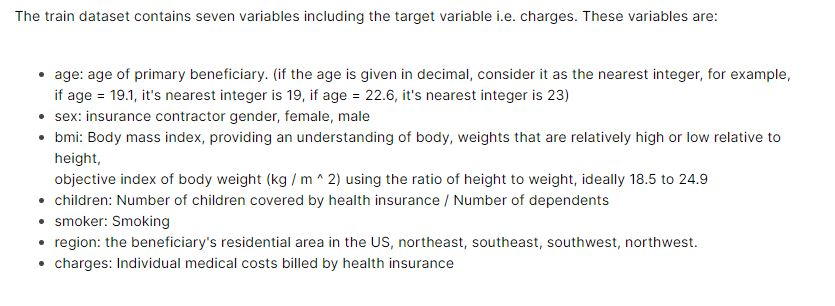

## Evaluation Matrix

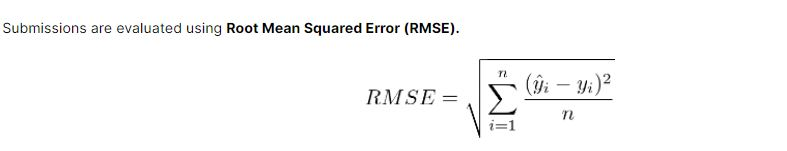

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Install Pycaret

In [2]:
%%capture
# install the full version
!pip install pycaret[full]

## Data Processing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#
import pycaret
from pycaret.regression import *

## Import Data

In [2]:
train = pd.read_csv("/content/drive/MyDrive/dphi/Train_Data_medical_cost.csv")
test = pd.read_csv("/content/drive/MyDrive/dphi/Medical_csot_test.csv")
sub = pd.read_csv("/content/drive/MyDrive/dphi/Sample_Submission_medical_cost.csv")

## Number of samples and features

In [3]:
train.shape,test.shape

((3630, 7), (492, 6))

## Display first 5 samples of the training dataset

In [6]:
train.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


## Summary Stastistics - Train data

In [8]:
train.describe(include='all')

,age,sex,bmi,smoker,region,children,charges
count,3630.000000,3630,3630.000000,3630,3630,3630.000000,3630.000000
unique,NaN,2,NaN,2,4,NaN,NaN
top,NaN,male,NaN,no,southeast,NaN,NaN
freq,NaN,2029,NaN,3070,1021,NaN,NaN
mean,38.887036,NaN,30.629652,NaN,NaN,2.503581,12784.808644
std,12.151029,NaN,5.441307,NaN,NaN,1.712568,10746.166743
min,18.000000,NaN,15.960000,NaN,NaN,0.000000,1121.873900
25%,29.000000,NaN,26.694526,NaN,NaN,1.000000,5654.818262
50%,39.170922,NaN,30.200000,NaN,NaN,3.000000,9443.807222
75%,48.343281,NaN,34.100000,NaN,NaN,4.000000,14680.407505


## Summary Statistics - Test data

In [9]:
test.describe(include='all')

,age,sex,bmi,smoker,region,children
count,492.000000,492,492.000000,492,492,492.000000
unique,NaN,2,NaN,2,4,NaN
top,NaN,male,NaN,no,northeast,NaN
freq,NaN,286,NaN,430,146,NaN
mean,38.840527,NaN,30.682976,NaN,NaN,2.512195
std,12.408765,NaN,5.426067,NaN,NaN,1.684315
min,18.000000,NaN,16.815000,NaN,NaN,0.000000
25%,28.754692,NaN,26.991596,NaN,NaN,1.000000
50%,39.051877,NaN,29.979531,NaN,NaN,2.000000
75%,49.000001,NaN,33.776529,NaN,NaN,4.000000


* No missing data as evident from the count(train and test)

## Data Processing 

* Rounding age of primary beneficiary to nearest integer

* BMI body mass index is the ratio of weight to the height. Grouping people on the basis of bmi as underweight, normal, overweight and obese.

       * Underweight: [0-18.5)

       * Normal : [18.5, 25)

       * Overweight : [25, 30)

       * Obese : [30+]

* Create a new feature age_category to bucket the ages 
      * Infant: [0-2)

      * Toddler : [2, 5)

      * Child : [5, 13)

      * Teen : [13- 20)

      * Adult : [20, 40)

      * Middle Age_Adult : [40, 60)

      * Senior Adult : [60+]

## Rounding Age

In [4]:
train['age'] = train['age'].round().astype(int)
test['age'] = test['age'].round().astype(int)

In [5]:
train.head()

,age,sex,bmi,smoker,region,children,charges
0,21,male,25.745000,no,northeast,2,3279.868550
1,37,female,25.744165,yes,southeast,3,21454.494239
2,18,male,30.030000,no,southeast,1,1720.353700
3,37,male,30.676891,no,northeast,3,6801.437542
4,58,male,32.010000,no,southeast,1,11946.625900


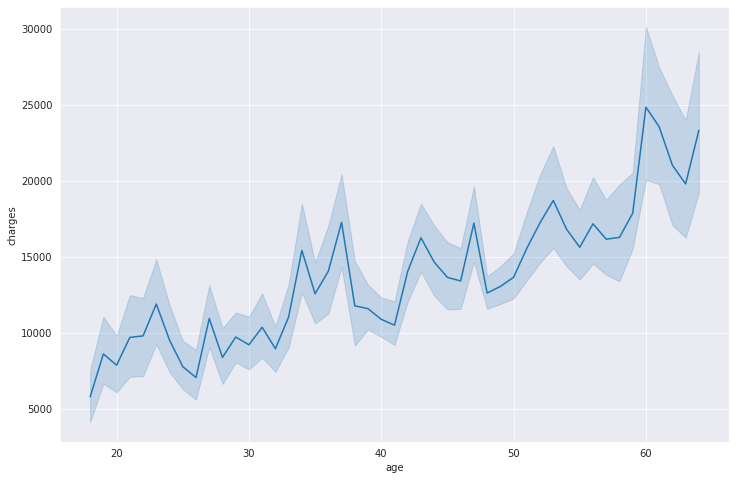

In [6]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.lineplot(x='age',y='charges',data=train)

* as the age increases the medical charges increases

<Figure size 864x576 with 0 Axes>

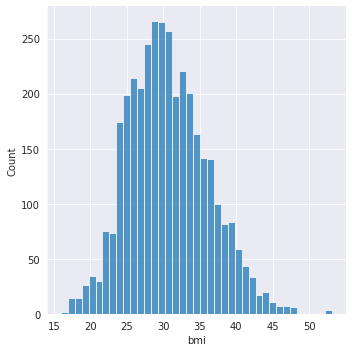

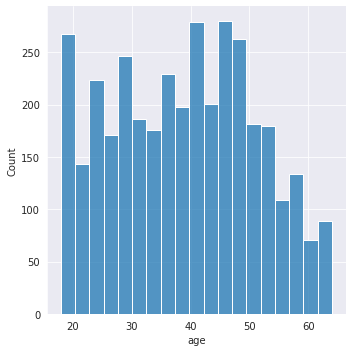

In [19]:
plt.figure(figsize=(12,8))
sns.displot(train.bmi)
sns.displot(train.age)

In [20]:
train.age.describe()

count    3630.000000
mean       38.887879
std        12.154074
min        18.000000
25%        29.000000
50%        39.000000
75%        48.000000
max        64.000000
Name: age, dtype: float64

## Define Function to generate body category

In [8]:
def group_bmi(x):
  if x >= 0 and x <= 18.5:
    return 'underweight'
  elif x > 18.5 and x <= 25:
    return "normal"
  elif x > 25 and x <= 30:
    return "overweight"
  else:
    return "obese"


In [9]:
train['body_category'] = train['bmi'].apply(lambda x : group_bmi(x))
test['body_category'] = test['bmi'].apply(lambda x : group_bmi(x))

## Body category and charges

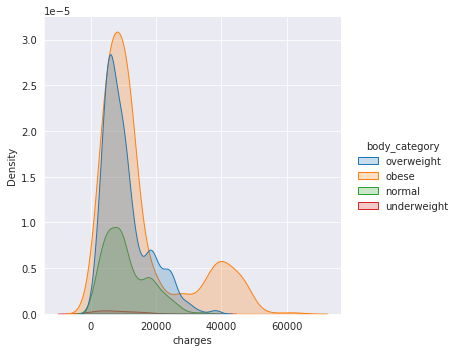

In [26]:
sns.displot(train, x= "charges", hue= "body_category", kind="kde",  fill=True)

* obese people spend more on medical
* poportion of overweight and obese people is more in the sample

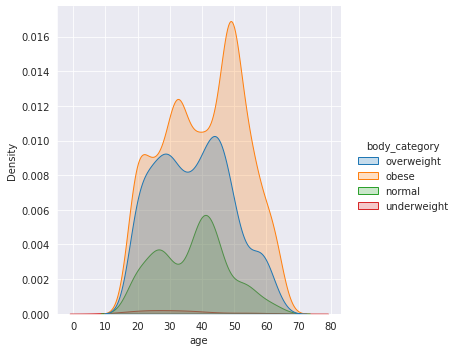

In [27]:
sns.displot(train, x= "age", hue= "body_category", kind="kde",  fill=True)

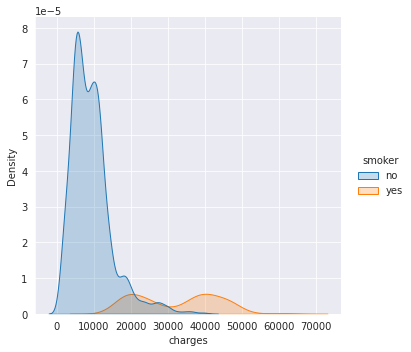

In [29]:
sns.displot(train, x= "charges", hue= "smoker", kind="kde",  fill=True)

* Smokers spend more on medical costs

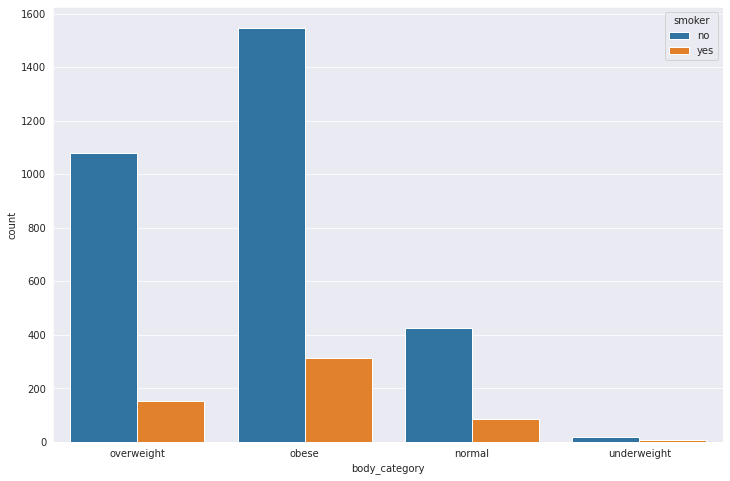

In [10]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.countplot(x='body_category',data=train,hue='smoker' )

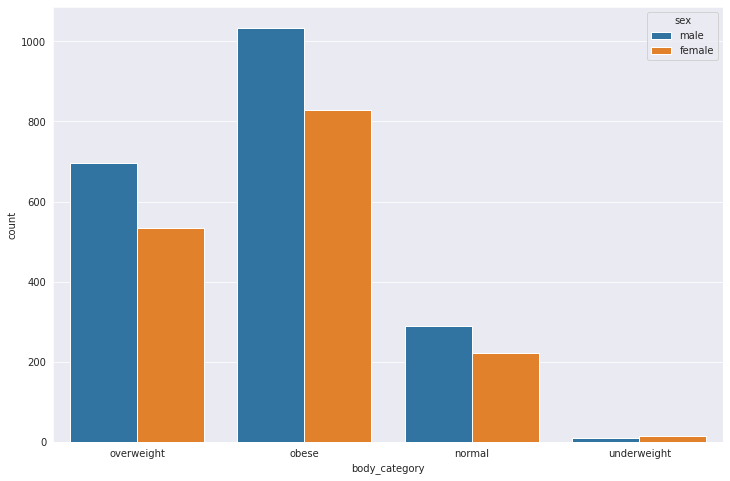

In [11]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.countplot(x='body_category',data=train,hue='sex' )

<Figure size 864x576 with 0 Axes>

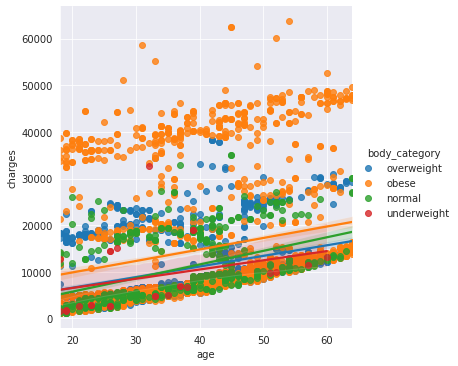

In [12]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.lmplot(data= train, y= "charges", x= "age", hue= "body_category")

<Figure size 864x576 with 0 Axes>

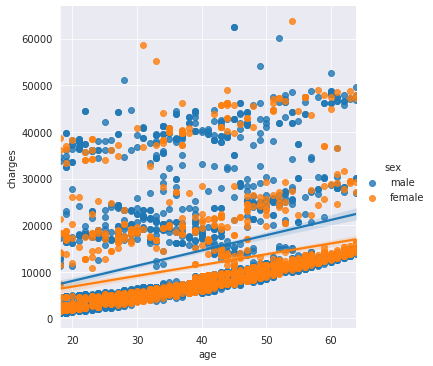

In [13]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.lmplot(data= train, y= "charges", x= "age", hue= "sex")

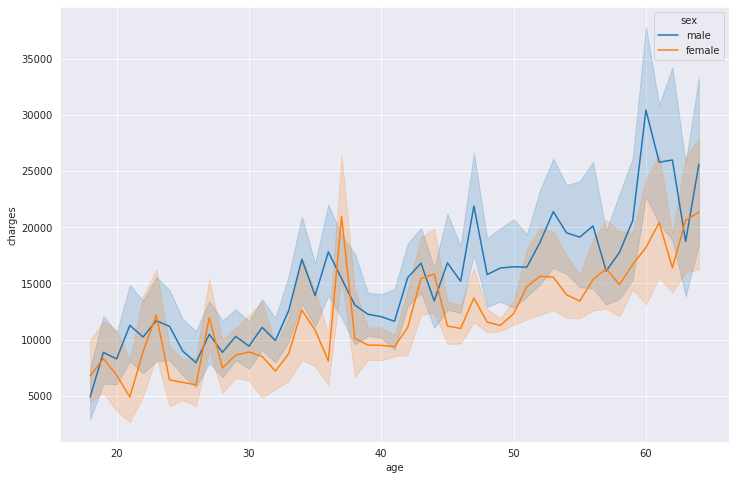

In [14]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.lineplot(x='age',y='charges',data=train,hue='sex')

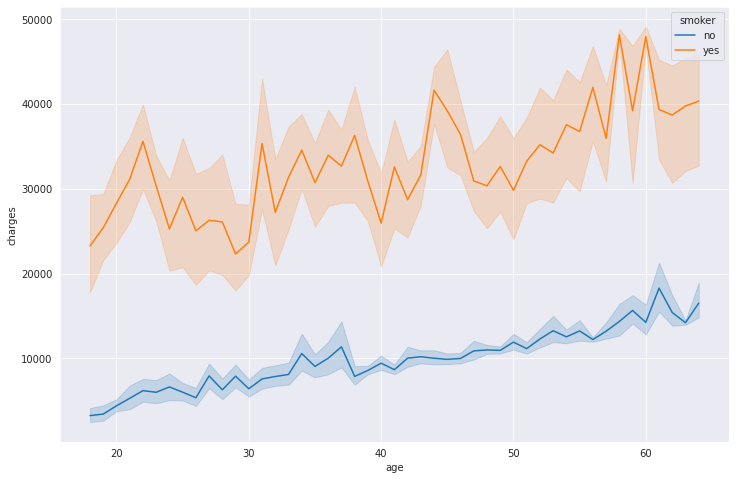

In [17]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.lineplot(x='age',y='charges',data=train,hue='smoker')

* Clearly evident that non somkers incur less medical expenses

## Create age_category features

In [25]:
def age_bin(x):
  if x >= 0 and x < 2:
    return "infant"
  elif x >= 2 and x< 5:
    return "toddler"
  elif x >=5 and x < 13:
    return "child"
  elif x >= 13 and x < 20:
    return "teen"
  elif x >= 20 and x < 40 :
    return "adult"
  elif x >= 40 and x < 60:
    return "middle_aged"
  else:
    return "senior"

In [26]:
train['age_group']  = train['age'].apply(lambda x : age_bin(x) )

In [27]:
test['age_group'] = test['age'].apply(lambda x : age_bin(x) )

In [28]:
train.head()

,age,sex,bmi,smoker,region,children,charges,body_category,age_group
0,21,male,25.745000,no,northeast,2,3279.868550,overweight,adult
1,37,female,25.744165,yes,southeast,3,21454.494239,overweight,adult
2,18,male,30.030000,no,southeast,1,1720.353700,obese,teen
3,37,male,30.676891,no,northeast,3,6801.437542,obese,adult
4,58,male,32.010000,no,southeast,1,11946.625900,obese,middle_aged


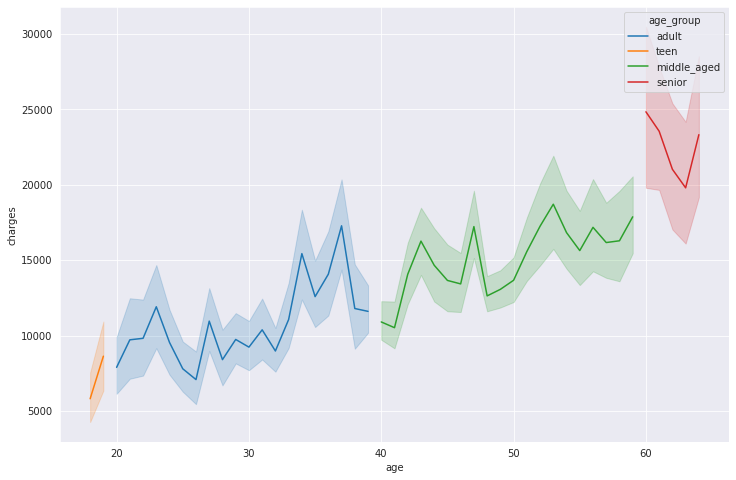

In [30]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.lineplot(x='age',y='charges',data=train,hue='age_group')

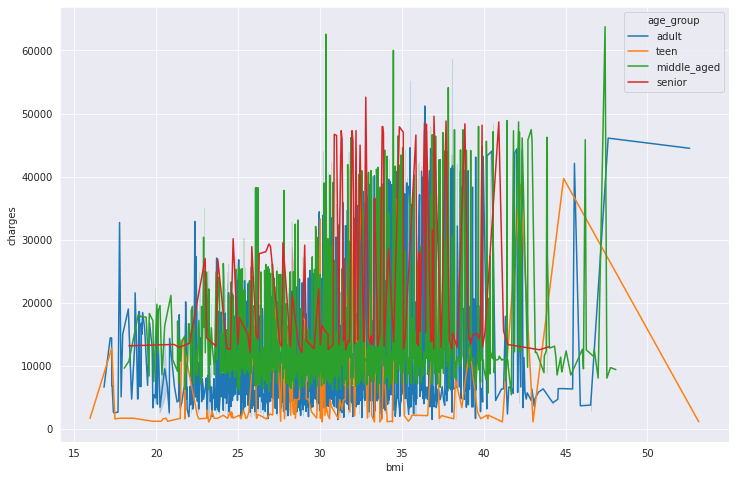

In [31]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.lineplot(x='bmi',y='charges',data=train,hue='age_group')

## Check Missing Values

In [32]:
train.isnull().sum()

age              0
sex              0
bmi              0
smoker           0
region           0
children         0
charges          0
body_category    0
age_group        0
dtype: int64

In [33]:
test.isnull().sum()

age              0
sex              0
bmi              0
smoker           0
region           0
children         0
body_category    0
age_group        0
dtype: int64

In [34]:
train.head()

,age,sex,bmi,smoker,region,children,charges,body_category,age_group
0,21,male,25.745000,no,northeast,2,3279.868550,overweight,adult
1,37,female,25.744165,yes,southeast,3,21454.494239,overweight,adult
2,18,male,30.030000,no,southeast,1,1720.353700,obese,teen
3,37,male,30.676891,no,northeast,3,6801.437542,obese,adult
4,58,male,32.010000,no,southeast,1,11946.625900,obese,middle_aged


In [35]:
test.head()

,age,sex,bmi,smoker,region,children,body_category,age_group
0,40,male,29.900000,no,southwest,2,overweight,middle_aged
1,47,male,32.300000,no,southwest,1,obese,middle_aged
2,54,female,28.880000,no,northeast,2,overweight,middle_aged
3,37,male,30.568094,no,northeast,3,obese,adult
4,59,male,33.132854,yes,northeast,4,obese,middle_aged


## Setup Pycaret Environment

In [36]:
reg = setup(data = train, 
            target = 'charges',
            use_gpu =True,
            preprocess=True,
            log_data=True,
            log_experiment=True,
            normalize=True)

,Description,Value
0,session_id,1899
1,Target,charges
2,Original Data,"(3630, 9)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2540, 22)"


## Comapre Models

In [37]:
best = compare_models(n_select = 15,sort='RMSE')
compare_model_results = pull()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,1.664642e+03,1.377315e+07,3.697231e+03,8.838000e-01,0.3068,0.1653,1.199
catboost,CatBoost Regressor,1.865611e+03,1.388718e+07,3.713371e+03,8.822000e-01,0.3185,0.1855,1.013
lightgbm,Light Gradient Boosting Machine,1.968213e+03,1.453815e+07,3.802028e+03,8.768000e-01,0.3241,0.1970,0.069
et,Extra Trees Regressor,1.441490e+03,1.482603e+07,3.837874e+03,8.758000e-01,0.3234,0.1578,1.238
xgboost,Extreme Gradient Boosting,1.859350e+03,1.492022e+07,3.850082e+03,8.740000e-01,0.3348,0.1927,0.989
gbr,Gradient Boosting Regressor,2.070858e+03,1.525808e+07,3.896747e+03,8.707000e-01,0.3176,0.2079,0.206
dt,Decision Tree Regressor,1.725513e+03,2.424998e+07,4.915497e+03,7.961000e-01,0.3698,0.1846,0.014
llar,Lasso Least Angle Regression,3.927051e+03,3.207269e+07,5.659604e+03,7.290000e-01,0.4477,0.3624,0.015
lasso,Lasso Regression,3.933110e+03,3.208544e+07,5.660724e+03,7.288000e-01,0.4656,0.3628,0.014
ridge,Ridge Regression,3.937631e+03,3.208901e+07,5.661073e+03,7.288000e-01,0.4573,0.3637,0.019


## Building the RandomForestRegressor Model

In [78]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1652.9498,1.483421e+07,3851.5209,0.8520,0.3513,0.1821
1,1895.2328,1.770932e+07,4208.2444,0.8727,0.3173,0.1656
2,1608.3859,1.148180e+07,3388.4800,0.9134,0.3027,0.1968
3,1759.8843,1.465632e+07,3828.3574,0.8621,0.2937,0.1497
4,1615.0659,1.146862e+07,3386.5357,0.9037,0.2449,0.1538
5,1732.0284,1.436037e+07,3789.5078,0.8781,0.3197,0.1745
6,1787.2448,1.769648e+07,4206.7190,0.8497,0.3790,0.1581
7,1557.4803,1.143869e+07,3382.1126,0.9154,0.3232,0.1855
8,1446.6931,1.076988e+07,3281.7493,0.8977,0.2516,0.1311
9,1591.4542,1.331580e+07,3649.0824,0.8933,0.2845,0.1560


## Tune the RFregressor Model

In [81]:
tuned_rf = tune_model(rf,optimize = 'RMSE',search_library = 'optuna')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1909.9360,1.457020e+07,3817.0930,0.8547,0.3446,0.2068
1,2006.1597,1.685047e+07,4104.9324,0.8789,0.3123,0.1768
2,1824.3693,1.154170e+07,3397.3079,0.9129,0.2750,0.1977
3,2109.9826,1.683832e+07,4103.4523,0.8416,0.3008,0.1786
4,1895.8036,1.332445e+07,3650.2677,0.8881,0.2609,0.1726
5,1872.9526,1.343593e+07,3665.5059,0.8860,0.2958,0.1810
6,1982.0807,1.943484e+07,4408.4963,0.8350,0.3632,0.1645
7,1709.2732,1.030894e+07,3210.7544,0.9237,0.3103,0.2012
8,1775.2769,1.284991e+07,3584.6767,0.8780,0.2924,0.1877
9,1841.4179,1.473806e+07,3839.0182,0.8819,0.2837,0.1812


##Tuned Hyperparameters

In [92]:
tuned_rf

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features=0.8792826777196687,
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.010577893639570932,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=9, min_weight_fraction_leaf=0.0,
                      n_estimators=46, n_jobs=-1, oob_score=False,
                      random_state=1899, verbose=0, warm_start=False)

## Analyze the model

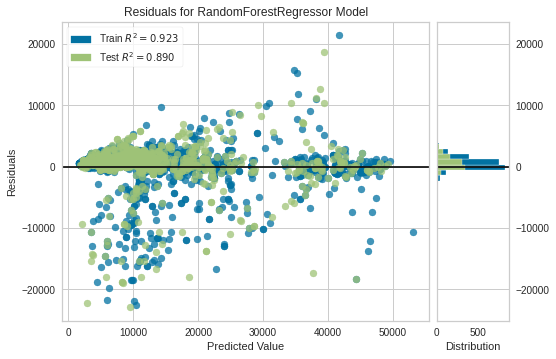

In [82]:
plot_model(tuned_rf)

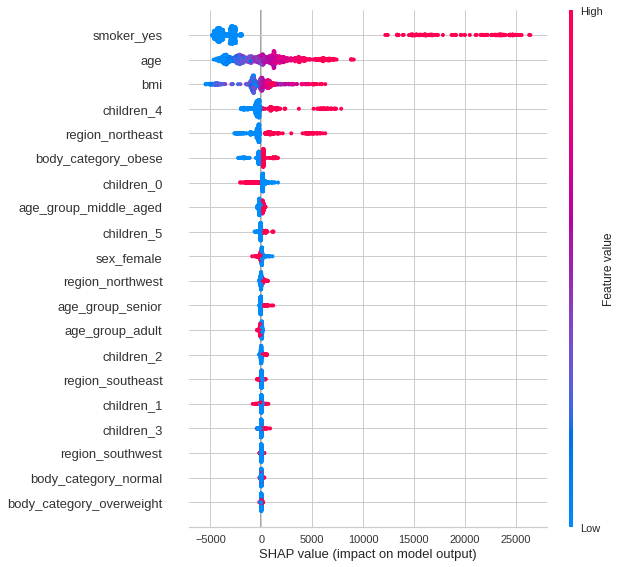

In [93]:
interpret_model(tuned_rf)

## Evaluate Model

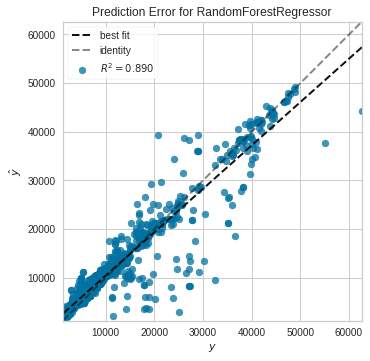

In [84]:
evaluate_model(tuned_rf)

In [96]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Predictions on Validation Data

In [86]:
val_rf_pred = predict_model(tuned_rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,1689.2859,1.147475e+07,3387.4397,0.89,0.2764,0.1669


In [87]:
val_rf_pred

,age,bmi,sex_female,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,children_0,children_1,children_2,children_3,children_4,children_5,body_category_normal,body_category_obese,body_category_overweight,body_category_underweight,age_group_adult,age_group_middle_aged,age_group_senior,age_group_teen,charges,Label
0,0.013942,2.086612,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,44397.390625,43881.430476
1,0.828010,1.073656,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,11200.531250,11028.597325
2,1.642078,-0.428605,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,14064.427734,14063.397432
3,-1.288567,0.450275,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4518.229980,4876.701566
4,0.746603,-1.442005,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8269.043945,10374.671113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,-0.555906,0.308780,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,6123.998535,5782.882251
1086,1.397858,-0.343054,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,11658.378906,12187.464890
1087,0.095349,-2.157895,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,18099.525391,17066.445083
1088,-0.311686,0.755897,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5729.005371,6536.447105


## Make Predictions

In [88]:
# predictions on new dataset
pred_new_rf = predict_model(tuned_rf, data = test) #new_data is pd dataframe

In [89]:
pred_new_rf = pred_new_rf.rename(columns={'Label':'prediction'})

In [90]:
pred_new_rf

,age,sex,bmi,smoker,region,children,body_category,age_group,prediction
0,40,male,29.900000,no,southwest,2,overweight,middle_aged,8308.171418
1,47,male,32.300000,no,southwest,1,obese,middle_aged,10794.592116
2,54,female,28.880000,no,northeast,2,overweight,middle_aged,12799.389383
3,37,male,30.568094,no,northeast,3,obese,adult,7370.691639
4,59,male,33.132854,yes,northeast,4,obese,middle_aged,42214.347267
...,...,...,...,...,...,...,...,...,...
487,51,male,27.740000,no,northeast,1,overweight,middle_aged,11056.223568
488,33,male,42.400000,no,southwest,5,obese,adult,6271.588764
489,48,male,29.064615,no,northeast,4,overweight,middle_aged,14160.069543
490,42,female,24.260852,no,southeast,5,normal,middle_aged,9773.681739


In [91]:
pred_new_rf[['prediction']].to_csv('dphi_pycaret_rf_regressor.csv',index=False)

**RandomForestRegressor Scores :  4234.403588306586.**

## Blend Models
Blending models is a method of ensembling which uses consensus among estimators to generate final predictions. The idea behind blending is to combine different machine learning algorithms and use a majority vote or the average predicted probabilities in case of classification to predict the final outcome.

In [38]:
# train a voting regressor dynamically
blender_specific = blend_models(estimator_list = compare_models(n_select = 5))

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1712.9596,1.408410e+07,3752.8790,0.8595,0.3580,0.1934
1,1790.0246,1.542028e+07,3926.8663,0.8892,0.3084,0.1611
2,1595.9683,1.081321e+07,3288.3442,0.9184,0.2906,0.1930
3,1882.6444,1.529298e+07,3910.6240,0.8561,0.3111,0.1700
4,1636.1363,1.045074e+07,3232.7600,0.9122,0.2667,0.1707
5,1693.1472,1.349199e+07,3673.1438,0.8855,0.3290,0.1772
6,1684.9722,1.616678e+07,4020.7931,0.8627,0.3465,0.1401
7,1677.1408,1.158441e+07,3403.5879,0.9143,0.3273,0.2022
8,1413.3084,9.742279e+06,3121.2624,0.9075,0.2407,0.1323
9,1631.0553,1.329159e+07,3645.7639,0.8935,0.2870,0.1621


## Display the models used

In [39]:
blender_specific 

VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                          

## Analyzing model performance in PyCaret 

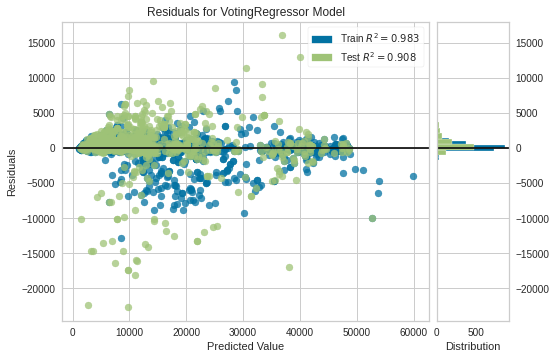

In [40]:
plot_model(blender_specific)

## Evaluate Model

In [44]:
evaluate_model(blender_specific)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Make predictions on the validation set 

In [45]:
val_pred = predict_model(blender_specific)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,1492.2403,9.637168e+06,3104.3789,0.9076,0.2761,0.1586


In [46]:
val_pred 

,age,bmi,sex_female,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,children_0,children_1,children_2,children_3,children_4,children_5,body_category_normal,body_category_obese,body_category_overweight,body_category_underweight,age_group_adult,age_group_middle_aged,age_group_senior,age_group_teen,charges,Label
0,0.013942,2.086612,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,44397.390625,44413.410432
1,0.828010,1.073656,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,11200.531250,11182.875857
2,1.642078,-0.428605,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,14064.427734,13971.935093
3,-1.288567,0.450275,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4518.229980,5838.423481
4,0.746603,-1.442005,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8269.043945,11848.106404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,-0.555906,0.308780,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,6123.998535,5513.242913
1086,1.397858,-0.343054,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,11658.378906,11383.465191
1087,0.095349,-2.157895,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,18099.525391,18251.008126
1088,-0.311686,0.755897,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5729.005371,5839.482383


## Make Predictions

In [48]:
# predictions on new dataset
pred_new = predict_model(blender_specific, data = test) #new_data is pd dataframe

In [49]:
pred_new = pred_new.rename(columns={'Label':'prediction'})

In [50]:
pred_new 

,age,sex,bmi,smoker,region,children,body_category,age_group,prediction
0,40,male,29.900000,no,southwest,2,overweight,middle_aged,8377.962146
1,47,male,32.300000,no,southwest,1,obese,middle_aged,9769.989609
2,54,female,28.880000,no,northeast,2,overweight,middle_aged,12876.299944
3,37,male,30.568094,no,northeast,3,obese,adult,7752.541233
4,59,male,33.132854,yes,northeast,4,obese,middle_aged,41332.594712
...,...,...,...,...,...,...,...,...,...
487,51,male,27.740000,no,northeast,1,overweight,middle_aged,11882.302520
488,33,male,42.400000,no,southwest,5,obese,adult,6571.728372
489,48,male,29.064615,no,northeast,4,overweight,middle_aged,14231.991757
490,42,female,24.260852,no,southeast,5,normal,middle_aged,9526.739047


In [51]:
pred_new[['prediction']].to_csv('dphi_pycaret_voting_regressor.csv',index=False)

**Blender Model Submission Submission successful! Your score is 4139.4076000571085**

**Voting Regressor Submission score is 4084.5919179367957.**

##Save Models

In [65]:
save_model(blender_specific , '/content/drive/MyDrive/dphi/blender_specific_saved_06142021')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                                                            learning_rate=0.300000012,
                                                            max_delta_step=0,
                                                            max_depth=6,
                                                            min_child_weigh

In [66]:
# Loading the saved model
blend_saved = load_model('/content/drive/MyDrive/dphi/blender_specific_saved_06142021')

Transformation Pipeline and Model Successfully Loaded


In [67]:
pred = blend_saved.predict(test)

In [68]:
pred[:5]

array([ 8377.96214579,  9769.9896093 , 12876.29994404,  7752.54123284,
       41332.59471238])

## Interfaces for  ML Models using Gradio

Gradio allows you to quickly create customizable UI components around your TensorFlow or PyTorch models, or even arbitrary Python functions. Mix and match components to support any combination of inputs and outputs. Our core library is free and open-source!

In [71]:
%%capture
!pip install -q gradio

In [72]:
import gradio as gr

## Create Preprocessing functions

In [73]:
def encode_attributes(df): # Binning ages 
    df['body_category'] = df['bmi'].apply(lambda x : group_bmi(x)) 
    df['age_group'] = df['age'].apply(lambda x : age_bin(x) )
    return df

## Create Predict Function

In [74]:
def predict_charges(age, bmi,sex,smoker,region,children):
    df = pd.DataFrame.from_dict({'sex': [sex], 'age': [age], 'smoker': [smoker],'bmi':[bmi],'region':[region],'children':[children]})
    df = encode_attributes(df)
    pred = blend_saved.predict(df).tolist()[0]
    return 'charges : '+str(pred)+" in rupees"

## Test Predict Function

In [75]:
predict_charges(age=17, bmi=30,sex='male',smoker='no',region='northwest',children=2)

'charges : 9783.027470015108 in rupees'

## Build a shareable UI 

In [76]:
sex = gr.inputs.Radio(['female', 'male'], label="sex")
smoker = gr.inputs.Radio(['no', 'yes'], label="smoker")
children = gr.inputs.Radio([2, 3, 1, 4, 5, 0], label="children")
region = gr.inputs.Radio(['northeast', 'southeast', 'northwest', 'southwest'], label="region")
age = gr.inputs.Slider(minimum=15, maximum=75, default=16, label="age")
bmi = gr.inputs.Slider(minimum=15, maximum=60, default=16, label="bmi")


gr.Interface(predict_charges, inputs=[age, bmi,sex,smoker,region,children], 
             outputs="label",
             title="Medical Insurance Cost Prediction",
             capture_session=True,
             live=True).launch();

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://15930.gradio.app
Interface loading below...
